# Project 8: Personal Data & Visualization
By Arham Khan

For this project, I decided to use my Instagram data as it is my most used social media platform. I first requested a takeout file from my Meta Accounts Center, and then downloaded the zip file with all my data. Since we are working with timestamps, I went through the files and picked out JSON files for my liked posts and comments which included timestamps.

In [45]:
#importing libraries
import pandas as pd
import json
import matplotlib.pyplot as plt

# Part 1

In [46]:
#load JSON file with my Instagram likes data
with open('liked_posts.json', 'r') as file:
    likes_data = json.load(file)

#convert to dataframe
likes_df = pd.DataFrame(likes_data['likes_media_likes'])
likes_df.head()

,title,string_list_data
0,amealwormscameraroll,[{'href': 'https://www.instagram.com/p/C2dSQzl...
1,kianaching_,[{'href': 'https://www.instagram.com/p/C2Xn_2Y...
2,d.orothea,[{'href': 'https://www.instagram.com/p/C2YhNro...
3,val_yeeta,[{'href': 'https://www.instagram.com/p/C2SpyI8...
4,ronaldo_mgl,[{'href': 'https://www.instagram.com/reel/C1Lu...


Since the data is nested, it needs to be unpacked and the timestamps need to be extracted and processed.

In [20]:
#initialize empty list for storing timestamps
timestamps = []
for entry in likes_df['string_list_data']:
    #iterate through the list of dictionaries
    for item in entry:
        # Extract the timestamp and convert to a more readable form
        timestamp = pd.to_datetime(item['timestamp'], unit='s')
        timestamps.append(timestamp)
        
timestamps_df = pd.DataFrame(timestamps, columns=['timestamp'])

# Display the first few rows
print(timestamps_df.head())

# Export to CSV
timestamps_df.to_csv('instagram_likes_timestamps.csv', index=False)

            timestamp
0 2024-01-24 08:48:22
1 2024-01-22 09:09:39
2 2024-01-22 02:45:01
3 2024-01-19 18:15:36
4 2024-01-19 02:22:53


# Part 2

In [47]:
#double load data just to be sure
timestamps_df = pd.read_csv('instagram_likes_timestamps.csv')
timestamps_df['timestamp'] = pd.to_datetime(timestamps_df['timestamp'])

#check to see if format is proper
print(timestamps_df.dtypes)

timestamp    datetime64[ns]
dtype: object


Next step is to sort and load timestamps_df, and then calculate time differences for some insights. This includes longest and average intervals, as well day and month with the most events/instances (or likes).

In [28]:
#sort and calculate time difference
timestamps_df = timestamps_df.sort_values(by='timestamp')
timestamps_df['time_diff'] = timestamps_df['timestamp'].diff().dropna()

#display longest interval
longest_interval = timestamps_df['time_diff'].max()
print("Longest interval:", longest_interval)

#display average interval
average_interval = timestamps_df['time_diff'].mean()
print("Average interval:", average_interval)


Longest interval between timestamps: 30 days 11:19:01
Average interval between timestamps: 0 days 08:39:23.297029702


In [29]:
#display most active day
timestamps_df['day'] = timestamps_df['timestamp'].dt.date
day_counts = timestamps_df['day'].value_counts()
most_active_day = day_counts.idxmax()
most_active_day_count = day_counts.max()

print("Day with the most likes:", most_active_day)
print("Number of likes on that day:", most_active_day_count)


Day with the most events: 2023-07-06
Number of events on that day: 13


In [48]:
#display most active month
timestamps_df['month'] = timestamps_df['timestamp'].dt.to_period('M')
month_counts = timestamps_df['month'].value_counts()
most_active_month = month_counts.idxmax()
most_active_month_count = month_counts.max()
print("Month with the most likes:", most_active_month)
print("Number of likes in that month:", most_active_month_count)

Month with the most likes: 2023-03
Number of likes in that month: 131


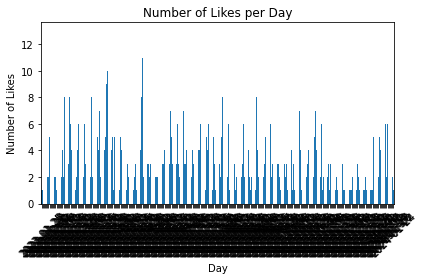

In [36]:
timestamps_df['timestamp'].groupby(timestamps_df['timestamp'].dt.date).count().plot(kind='bar')
plt.title('Number of Likes per Day')
plt.xlabel('Day')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part 3
Since I am analyzing my own data (no partner data sadly), I decided to work with my liked comments data too to make some combined visualizations.

First step is to prep the comments data for analysis:

In [49]:
with open('liked_comments.json', 'r') as file:
    comments_data = json.load(file)
    
comments_df = pd.DataFrame(comments_data['likes_comment_likes'])
comments_df.head()

,title,string_list_data
0,m.semere,[{'href': 'https://www.instagram.com/p/C2dSQzl...
1,sam.kubishta,[{'href': 'https://www.instagram.com/p/C2dSQzl...
2,thddeusmd,[{'href': 'https://www.instagram.com/reel/C2aY...
3,sarah__watts__,[{'href': 'https://www.instagram.com/p/C1pAfHr...
4,llsilvera,[{'href': 'https://www.instagram.com/p/C1pAfHr...


In [50]:
#initialize empty list to store timestamps
comment_timestamps = []

#loop through each row in the dataframe
for index, row in comments_df.iterrows():
    #access the right key
    for item in row['string_list_data']:
        #extract the timestamp and convert form
        timestamp = pd.to_datetime(item['timestamp'], unit='s')
        comment_timestamps.append(timestamp)

#create a new df
comment_timestamps_df = pd.DataFrame(comment_timestamps, columns=['timestamp'])

#sort df by timestamp
comment_timestamps_df = comment_timestamps_df.sort_values(by='timestamp')
print(comment_timestamps_df.head())

              timestamp
188 2023-02-02 04:24:55
187 2023-02-02 04:52:29
186 2023-02-02 04:52:30
185 2023-02-09 07:13:46
184 2023-02-09 20:52:23


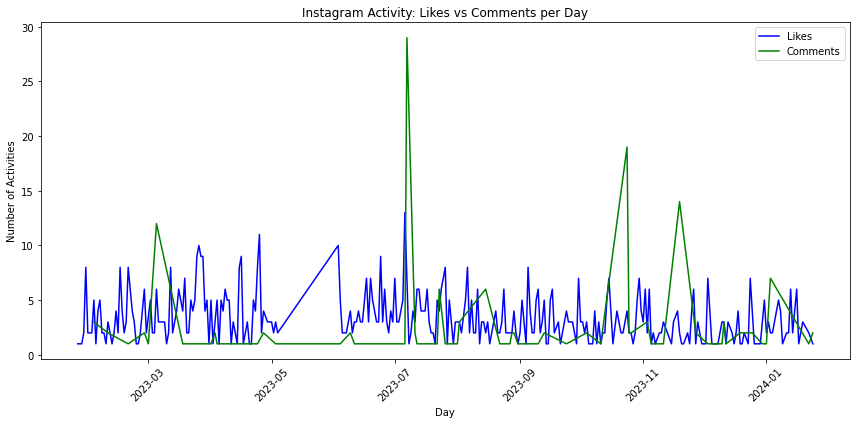

In [51]:
#grouping likes and comments by date
likes_per_day = timestamps_df['timestamp'].groupby(timestamps_df['timestamp'].dt.date).count()
comments_per_day = comment_timestamps_df['timestamp'].groupby(comment_timestamps_df['timestamp'].dt.date).count()

#visualizating
plt.figure(figsize=(12, 6))
plt.plot(likes_per_day, label='Likes', color='blue')
plt.plot(comments_per_day, label='Comments', color='green')
plt.title('Instagram Activity: Likes vs Comments per Day')
plt.xlabel('Day')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Part 4
To go a step further, I decided to create a plot to see how my instagram activity varies throughout a typical day.

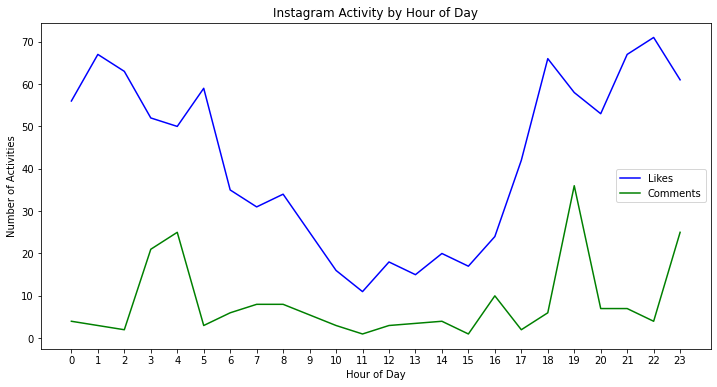

In [43]:
#convert timestamps to hours
timestamps_df['hour'] = timestamps_df['timestamp'].dt.hour
comment_timestamps_df['hour'] = comment_timestamps_df['timestamp'].dt.hour

#aggregate counts by hour
likes_per_hour = timestamps_df.groupby('hour').count()['timestamp']
comments_per_hour = comment_timestamps_df.groupby('hour').count()['timestamp']

#plot and visualize
plt.figure(figsize=(12, 6))
plt.plot(likes_per_hour, label='Likes', color='blue')
plt.plot(comments_per_hour, label='Comments', color='green')
plt.title('Instagram Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Activities')
plt.xticks(range(0, 24))  # Setting x-axis ticks to represent each hour of the day
plt.legend()
plt.show()

Now, let's see how my activity varies on different days of the week.

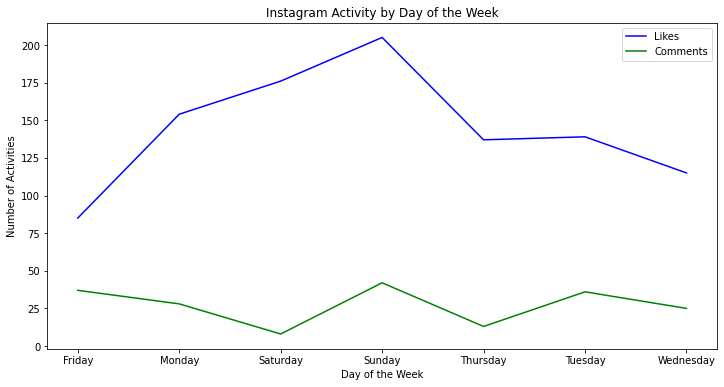

In [52]:
#convert timestamps to days of the week
timestamps_df['day_of_week'] = timestamps_df['timestamp'].dt.day_name()
comment_timestamps_df['day_of_week'] = comment_timestamps_df['timestamp'].dt.day_name()

#aggregate counts by day of the week
likes_per_day_of_week = timestamps_df.groupby('day_of_week').count()['timestamp']
comments_per_day_of_week = comment_timestamps_df.groupby('day_of_week').count()['timestamp']

#plot and visualize
plt.figure(figsize=(12, 6))
plt.plot(likes_per_day_of_week, label='Likes', color='blue')
plt.plot(comments_per_day_of_week, label='Comments', color='green')
plt.title('Instagram Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Activities')
plt.legend()
plt.show()

Looking at all the plots generated so far, I can notice a few key things:
1) There seems to be more of a routine in my likes, as the plot has a more consistent shape with similar peaks and lows alternating throughout the days. On the other hand, my comment likes spike up on certain days and the activity level seems to vary quite a lot. This is probably because of the days I am tagged in a post or if a close friend posts, I am more likely to return and like comments throughout the day.

2) My instagram like activity in the 'Activity by Hour' plot follows a pattern I guessed. My activity seems to taper off after midnight, indicating my bedtime, and picks up again slowly starting at 4pm once I am done with my classes and have time to browse social media. My comment likes follow a similar-ish pattern but to a lower extent, as I do it more rarely.

3) The third plot with 'Activity by Day of the Week' also makes sense to me and follows a general pattern. My likes activity is highest on Saturday and Sunday, as it's the weekend and I have more free time to browse Instagram, and seems to be much lower on the weekdays when there's school. My comment data also shows higher activity on Sunday and Friday, but not Saturday, possibly because my friends like to post more towards the end of the weekend.